# Using the OmicsIntegrator Package

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import networkx as nx

In [2]:
# Use the following lines to test the basic functionality of the package if developing locally: 
import sys
sys.path.insert(0, "/Users/alex/Documents/OmicsIntegrator2/src")
import graph as oi

# import OmicsIntegrator as oi

In [3]:
interactome_file = "../interactomes/inbiomap.9.12.2016.exp.oi2"
prize_file = "/Users/alex/Documents/abcd1/human_deseq_prizes_200.tsv"
graph = oi.Graph(interactome_file, {'g':5})

In [4]:
graph.prepare_prizes(prize_file)

06:17:46 - OI2: INFO - Duplicated gene symbols in the prize file (we'll keep the max prize):
06:17:46 - OI2: INFO - []
06:17:46 - OI2: INFO - Members of the prize file not present in the interactome:
06:17:46 - OI2: INFO - ['ATP6V0E1', 'CXorf36', 'GLT25D1', 'NORAD', 'TNFSF4']


In [5]:
vertex_indices, edge_indices = graph.pcsf()

In [6]:
len(vertex_indices)

77

In [7]:
forest, augmented_forest = graph.output_forest_as_networkx(vertex_indices, edge_indices)
forest

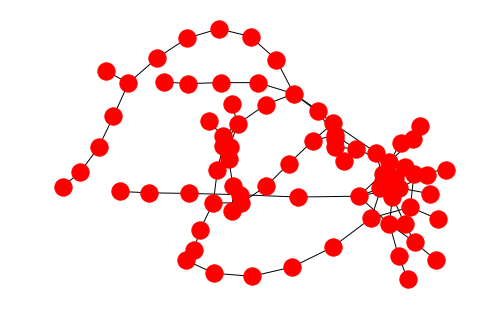

In [8]:
nx.draw_spring(augmented_forest)

In [9]:
graph.pcsf_objective_value(forest)

371.79260506471951

In [10]:
oi.get_networkx_graph_as_dataframe_of_nodes(augmented_forest).head()

,Base_Mean,P_adj,P_value,StdErr,Wald_Stats,betweenness,degree,general_function,general_process,location,log2FC,louvainClusters,prize,specific_function,specific_process,terminal,type
ABCD1,206.707,1.64822e-52,5.02096e-54,0.183205,15.4762,0.0263158,16,transporter,cellular process,peroxisome,-2.83532,0,5.51783,lipid transporter,cellular component organization,True,protein
ADD3,2596.83,3.43013e-293,5.41704e-296,0.062866,-36.7708,0,25,structural molecule,cellular process,nucleus,2.31163,2,2.92465,structural constituent of cytoskeleton,cellular component organization,True,protein
AMOTL2,3096.33,8.1149e-294,1.24782e-296,0.0530887,36.8106,0,79,binding,cellular process,cytoplasm,-1.95423,4,2.93091,protein binding,cell communication,True,protein
ANKRD1,15603.6,1e-310,1e-309,0.0403247,46.4681,0.169474,20,binding,cellular process,nucleus,-1.87382,4,3.1,protein binding,cellular response to stimulus,True,protein
ARHGDIB,NaN,NaN,NaN,NaN,NaN,0.190877,15,binding,biological regulation,extracellular,NaN,4,0,protein binding,regulation of biological process,False,protein


In [11]:
oi.output_networkx_graph_as_interactive_html(augmented_forest, '/Users/alex/Desktop/')

PosixPath('/Users/alex/Desktop/graph.html')